<a href="https://colab.research.google.com/github/sowmiya-r/Coursera_Capstone/blob/master/Week_5_Capstone_The_Battle_of_the_Neighborhood_Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project - The Battle of the Neighborhoods

## Applied Data Science Capstone by IBM/Coursera

by Sowmiya Ranganathan

## Best Restaurants Surfing through Zomato - New Delhi

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

This project aims to select the nearest restaurant listed out in Zomato based on the <b> specified location </b>. Specifically this report will be targeted to the customers who wants to have a dine-in in the restaurant of their likings.

New Delhi being the capital of India is filled with people with various likings, taste and preferences. When there is a weekend the tendency of the people is to spend a quality time with family and explore different places surrounding them. With the advancement in technology various apps provide the details of the places, restaurants and venues. Zomato being one of the popular app in this category provides details of the restaurants, ratings, the type of cuisine, the feedbacks given by the peer customers helps the people to identify more conveniently with just few clicks.

We will focus on the top restaurants in neighborhoods and the 5 most common venues in each neighborhood so that the best place to spend weekend suited to an individual's needs can be selected.

The following questions will be focused on and answered:
* Which type of cuisine is commonly found in the restaurants?
* Whether the cost specified under each restaurant is affecting its rating?
* Listing out the restaurants that provides Pre-Book option
* What are the restaurants surrounding the specified location?
* Final one to list out the other options/venues surrounding the location to spend the valuable time.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* number of  restaurants in the neighborhood (any type of restaurant)
* number of and distance of venues in the neighborhood, if any

We decided to use regularly spaced grid of locations, centered around city center, to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**
* coordinate of the venues for the selected restaurant will be obtained using **Foursquare API**

The dataset has been gathered from **Kaggle**

Reference: https://www.kaggle.com/sominwadhwa/where-what-to-eat-in-delhi-india-mapbox-w-plotly

This is going to be interesting...!

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of New Delhi that have restaurants, particularly those with other venues.

In first step we will concentrate on the cuisines of the restaurant. It will show a analysis of how many restaurants offers particular type of cuisine which helps to find out which cuisine is liked by the people in New Delhi.

Second step in our analysis will be to find out whether the cost is affecting the rating. Since if we choose a restaurant the first thing to be noted is to find out the ratings of the restaurant in order to find the top restaurants. In this analysis we will find out whether the cost of the food is affecting the rating.

Third step is mainly for the dine in where people check whether pre-book of table is available of out. This is most essential in the case of family day out.

In Fourth step we will find the nearby restaurant for the location specified. Here we will use Foursquare API to find out only the restaurants neatby the location and also other nearby venues to plan the weekend accordingly.

In fifth and final step we will focus on most promising areas and within those create clusters of locations that are the neighborhood of the New Delhi and they are clustered based on the categories of the venues in those locality.  We will present map of all such locations but also create clusters (using k-means clustering) of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration.

 ## Sneak Peak into the Dataset <a id="section1"></a>

#### Loading Relevant Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import folium
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geopy
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import pyproj

import pickle

import math

In [0]:
data = pd.read_csv("zomato.csv",encoding = "ISO-8859-1")
data.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


The data contains the following columns - 

1. Restaurant ID - Unique identification assigned to each restaurant by Zomato. In itself, for this dataset, it does not serve any useful purpose. 
2. Restaurant Name - Name of the Restaurant
3. Country Code
4. City*
5. Address
6. Locality
7. Locality Verbose - Locality along with City info*
8. Latitude*
9. Longitude*
10. Cusinies - List of cusines served*
11. Average Cost of two (INR if consider data from India/Indian Cities)*
12. Currency 
13. Has Table Booking (boolean)
14. Has Online Delivery (boolean)
15. Is Delivering Now (boolean)
16. Switch to order menu (boolean)
17. Price range (levels)
18. Aggregate rating (avg of all votes received)*
19. Rating Color (Zomato's lingo)
20. Rating text (V.Good,Good,Avg,Poor)*
21. Votes

*Points of Interest

Since most of Zomato's business is concentrated in & around New Delhi, India, so I'll be looking for places to eat around the New Delhi

In [0]:
#Filtering out only Restaurants from New Delhi
data_delhi=data[data['City']=='New Delhi']
data_delhi.reset_index(drop=True)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,18287358,Food Cloud,1,New Delhi,"Aaya Nagar, New Delhi",Aaya Nagar,"Aaya Nagar, New Delhi",0.000000,0.000000,Cuisine Varies,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,2
1,18216944,Burger.in,1,New Delhi,"84, Near Honda Showroom, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.196923,28.535382,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.2,Orange,Average,46
2,313333,Days of the Raj,1,New Delhi,"81/3, 1st Floor, Qutub Residency, Adchini, New...",Adchini,"Adchini, New Delhi",77.197475,28.535493,"North Indian, Seafood, Continental",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.4,Orange,Average,45
3,18384127,Dilli Ka Dhaba,1,New Delhi,"66 A, Ground Floor, Sri Aurobindo Marg, Adchin...",Adchini,"Adchini, New Delhi",77.198033,28.537547,"South Indian, North Indian",...,Indian Rupees(Rs.),No,No,No,No,2,2.6,Orange,Average,11
4,582,Govardhan,1,New Delhi,"84, Adjacent Hero Motor Bike Showroom, Main Me...",Adchini,"Adchini, New Delhi",77.196924,28.535523,"South Indian, North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.4,Orange,Average,238
5,18414465,Mezbaan Grills,1,New Delhi,"A- 96, Shri Aurbindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198122,28.538134,Mughlai,...,Indian Rupees(Rs.),No,No,No,No,1,3.1,Orange,Average,8
6,304243,Say Cheese,1,New Delhi,"88/3, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198159,28.537448,Fast Food,...,Indian Rupees(Rs.),No,Yes,No,No,1,2.7,Orange,Average,64
7,3554,Southy,1,New Delhi,"88/4, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.197950,28.537474,South Indian,...,Indian Rupees(Rs.),No,Yes,No,No,1,2.6,Orange,Average,113
8,18369872,Monosoz,1,New Delhi,"Sri Aurobindo Marg, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198042,28.538394,Pizza,...,Indian Rupees(Rs.),No,Yes,No,No,1,3.7,Yellow,Good,66
9,948,Waves,1,New Delhi,"A-4, Sarvodaya Enclave, Adchini, New Delhi",Adchini,"Adchini, New Delhi",77.198808,28.538666,"North Indian, Chinese",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,3.5,Yellow,Good,141


 ## Analysis <a id="analysis"></a>

Let's perform some basic explanatory data analysis and derive some additional info from our raw data.

In [0]:
#There are no null objects
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5473 entries, 2560 to 8032
Data columns (total 21 columns):
Restaurant ID           5473 non-null int64
Restaurant Name         5473 non-null object
Country Code            5473 non-null int64
City                    5473 non-null object
Address                 5473 non-null object
Locality                5473 non-null object
Locality Verbose        5473 non-null object
Longitude               5473 non-null float64
Latitude                5473 non-null float64
Cuisines                5473 non-null object
Average Cost for two    5473 non-null int64
Currency                5473 non-null object
Has Table booking       5473 non-null object
Has Online delivery     5473 non-null object
Is delivering now       5473 non-null object
Switch to order menu    5473 non-null object
Price range             5473 non-null int64
Aggregate rating        5473 non-null float64
Rating color            5473 non-null object
Rating text             5473 non-nul

In [0]:
data_delhi['Area']=data_delhi.Locality.str.split(',').str[1]
data_delhi.Area.fillna(data_delhi.Locality, inplace=True)

### 1. Number of Cuisines offered by the Restaurant

In [0]:
def number_of_cusines(temp):
    #print (temp)
    return len(temp.split(','))

In [0]:
data_delhi['Number of Cuisines Offered'] = data_delhi.Cuisines.apply(number_of_cusines)

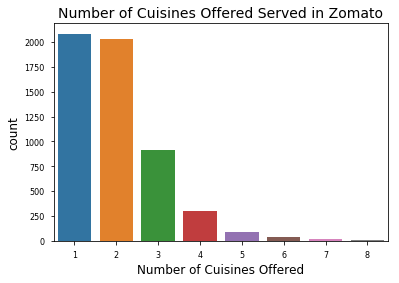

In [0]:
sns.set_context("paper", font_scale = 1, rc={"font.size": 12,"axes.titlesize": 14,"axes.labelsize": 12})   
b = sns.countplot(data = data_delhi,x = 'Number of Cuisines Offered', order = data_delhi['Number of Cuisines Offered'].value_counts().index)
plt.title('Number of Cuisines Offered Served in Zomato')
plt.show()

### 2. Are ratings affected by how cheap/expensive a restaurant is?

In [0]:
data_delhi['Text'] = data_delhi['Restaurant Name'] + "<br>" + data_delhi['Locality Verbose']
data_delhi_rest = data_delhi[['Restaurant Name','Aggregate rating',
                              'Average Cost for two']].groupby('Restaurant Name').mean()

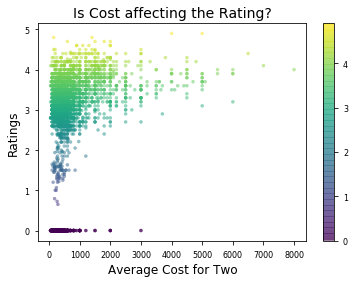

In [0]:
plt.scatter(x=data_delhi_rest['Average Cost for two'], y= data_delhi_rest['Aggregate rating'], c = data_delhi_rest['Aggregate rating'], s=10, alpha=0.5,cmap='viridis')
plt.title('Is Cost affecting the Rating?')
plt.xlabel('Average Cost for Two')
plt.ylabel('Ratings')
plt.colorbar()

As it seems, from a quick glance, there is no obseravable linear relationship. At almost every price point, there appears to be both Good and Bad restaurants.

### 3. Pre-booking a Lunch/Dinner on Perfect Weekend?

Here are some of the top restaurants in Delhi & it's neighbouring areas with the following characterstics - 

- **Have a rating > 4**
- **Have an option to pre-book a table**
-  **Had at least 50 people rate it on Zomato**

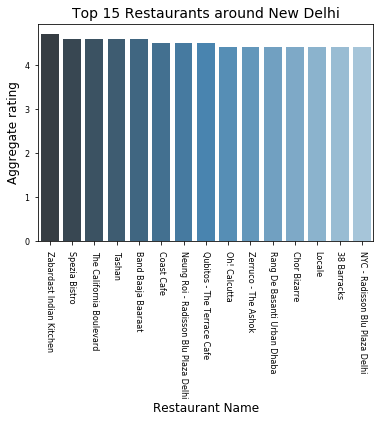

In [0]:
top_fine_dine = data_delhi.loc[(data_delhi['Has Table booking'] == "Yes") & (data_delhi['Aggregate rating'] > 4) & (data_delhi['Votes'] > 50)].sort_values('Aggregate rating', ascending = False)
x_ax = top_fine_dine.head(15)['Restaurant Name']
y_ax = top_fine_dine.head(15)['Aggregate rating']
sns.set_context("paper", font_scale = 1, rc={"font.size": 12,"axes.titlesize": 14,"axes.labelsize": 12})   
plot=sns.barplot(x=x_ax, y=y_ax, palette="Blues_d")
plot.set_xticklabels(plot.get_xticklabels(), rotation=270)
plt.title('Top 15 Restaurants around New Delhi')
plt.show()

We see that no restaurant(or chain of restaurants) is rated 5 out of 5, however we have few who are rated 4.9.
Further we have so many restaurants that are rated above 4.0, which is a good thing as this indicates that the quality of food is increasing in New Delhi.


### 4. Looking for a Restaurant near you?

In [0]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Aerocity, New Delhi")
latitudes=location.latitude
longitudes=location.longitude
print(location.address)
print((location.latitude, location.longitude))

Aerocity, Delhi-Gurugram Expressway, Bana Singh Enclave, Vasant Kunj, Rangpuri, New Delhi, Delhi, 110010, India
(28.54799, 77.1212395)


### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on restaurants in each neighborhood.

We're interested in venues in 'food' category, but only those that are proper restaurants - coffe shops, pizza places, bakeries etc. are not direct competitors so we don't care about those. So we will include in out list only venues that have 'restaurant' in category name.

In [0]:
#Initializing Foursquare API credentials
CLIENT_ID = 'CKW2SWATVUAYETIATITE1LVHNRFOUWPB4IYXFD0NL3JW3Q0U' # your Foursquare ID
CLIENT_SECRET = 'POPTT4EJBJOOSLKKQP5TS4CB3UHDDW2RV4BCE32B1GEKIPE1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
foursquare_client_id = 'CKW2SWATVUAYETIATITE1LVHNRFOUWPB4IYXFD0NL3JW3Q0U'
foursquare_client_secret = 'POPTT4EJBJOOSLKKQP5TS4CB3UHDDW2RV4BCE32B1GEKIPE1'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CKW2SWATVUAYETIATITE1LVHNRFOUWPB4IYXFD0NL3JW3Q0U
CLIENT_SECRET:POPTT4EJBJOOSLKKQP5TS4CB3UHDDW2RV4BCE32B1GEKIPE1


In [0]:
def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Below code will help us to find the restaurants and other venues such as Mall, airport, coffee shops nearby to the specified location with the help of latitude and longitude of the given location. The obtained result is then converted into pandas dataframe for easy readibility.

In [0]:
food_category = '4d4b7105d754a06374d81259'

def is_restaurant(categories):
    restaurant_words = ['restaurant', 'diner', 'taverna', 'steakhouse']
    restaurant = False
    for c in categories:
        category_name = c[0].lower()
        category_id = c[1]
        for r in restaurant_words:
            if r in category_name:
                restaurant = True
        if 'fast food' in category_name:
            restaurant = False
    return restaurant

def get_categories(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def format_address(location):
    address = ', '.join(location['formattedAddress'])
    address = address.replace(', Deutschland', '')
    address = address.replace(', Germany', '')
    return address

def get_venues_near_location(lat, lon, category, client_id, client_secret, radius=500, limit=100):
    version = '20180724'
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, category, radius, limit)
    try:
        results = requests.get(url).json()['response']['groups'][0]['items']
        venues = [(item['venue']['id'],
                   item['venue']['name'],
                   get_categories(item['venue']['categories']),
                   (item['venue']['location']['lat'], item['venue']['location']['lng']),
                   format_address(item['venue']['location']),
                   item['venue']['location']['distance']) for item in results]        
    except:
        venues = []
    return venues

In [0]:
def get_restaurants(lats, lons):
    restaurants = {}
    location_restaurants = []
    print('Obtaining venues around candidate locations:', end='')
    # Using radius=350 to meke sure we have overlaps/full coverage so we don't miss any restaurant (we're using dictionaries to remove any duplicates resulting from area overlaps)
    venues = get_venues_near_location(lat, lon, food_category, foursquare_client_id, foursquare_client_secret, radius=500, limit=100)
    area_restaurants = [] 
    for venue in venues:
        venue_id = venue[0]
        venue_name = venue[1]
        venue_categories = venue[2]
        venue_latlon = venue[3]
        venue_address = venue[4]
        venue_distance = venue[5]
        is_res = is_restaurant(venue_categories)
        if is_res:
            x, y = lonlat_to_xy(venue_latlon[1], venue_latlon[0])
            restaurant = (venue_id, venue_name, venue_latlon[0], venue_latlon[1], venue_address, venue_distance, x, y)
            if venue_distance<=300:
                area_restaurants.append(restaurant)
            restaurants[venue_id] = restaurant
    location_restaurants.append(area_restaurants)
    print(' .', end='')
    print(' done.')
    return restaurants, location_restaurants

In [0]:
restaurants, location_restaurants = get_restaurants(latitudes, longitudes)

Obtaining venues around candidate locations: . done.


#### The Top nearby Restaurants

In [0]:
print('Total number of restaurants:', len(restaurants))
print('Number of restaurants in neighborhood:', np.array([len(r) for r in location_restaurants]).mean())

Total number of restaurants: 9
Number of restaurants in neighborhood: 2.0


In [0]:
print('Restaurants around location')
print('---------------------------')
for i in range(len(location_restaurants)):
    rs = location_restaurants[i][:8]
    print('\n'.join(map(str, [r[1] for r in rs])))

Restaurants around location
---------------------------
DEL
Kheer


#### The Venues to lookaround nearby

With the help of Foursquare API , we will send a request URL to find out the nearby venues

In [0]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitudes, 
    longitudes, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=CKW2SWATVUAYETIATITE1LVHNRFOUWPB4IYXFD0NL3JW3Q0U&client_secret=POPTT4EJBJOOSLKKQP5TS4CB3UHDDW2RV4BCE32B1GEKIPE1&v=20180605&ll=28.54799,77.1212395&radius=500&limit=100'

In [0]:
results = requests.get(url).json()
results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '523fdf7893cd473e6e989d59',
   'name': 'Holiday Inn New Delhi International Airport',
   'location': {'address': 'Asset Area 12, Hospitality District Aero City',
    'crossStreet': 'Aero City, Delhi International Airport',
    'lat': 28.550078216696924,
    'lng': 77.12280152775952,
    'labeledLatLngs': [{'label': 'display',
      'lat': 28.550078216696924,
      'lng': 77.12280152775952}],
    'distance': 278,
    'postalCode': '110037',
    'cc': 'IN',
    'city': 'New Delhi',
    'state': 'Delhi',
    'country': 'India',
    'formattedAddress': ['Asset Area 12, Hospitality District Aero City (Aero City, Delhi International Airport)',
     'New Delhi 110037',
     'Delhi',
     'India']},
   'categories': [{'id': '4bf58dd8d48988d1fa931735',
     'name': 'Hotel',
     'pluralName': 'Hotels',
     'shortName': 'Hotel',
  

In [0]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [0]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

,name,categories,lat,lng
0,Holiday Inn New Delhi International Airport,Hotel,28.550078,77.122802
1,Roseate House,Hotel,28.550842,77.120526
2,Worldmark,Shopping Mall,28.550420,77.121765
3,Starbucks,Coffee Shop,28.551202,77.122679
4,Neung Roi,Thai Restaurant,28.543947,77.119859


In [0]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

16 venues were returned by Foursquare.


In [0]:
nearby_venues.reset_index(drop=True,inplace=True)
nearby_venues[nearby_venues.columns[0:2]] 

,name,categories
0,Holiday Inn New Delhi International Airport,Hotel
1,Roseate House,Hotel
2,Worldmark,Shopping Mall
3,Starbucks,Coffee Shop
4,Neung Roi,Thai Restaurant
5,The Radisson Blu Plaza,Hotel
6,Cafe Delhi Heights,Punjabi Restaurant
7,Lemon Tree Premier,Hotel
8,Delhi Aerocity Metro Station,Train Station
9,Ibis Delhi Airport Hotel,Hotel


In [0]:
locations = nearby_venues[['lat', 'lng']]
locationlist = locations.values.tolist()

In [0]:
map = folium.Map(location=[latitudes, longitudes], zoom_start=15)
for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup=nearby_venues['name'][point]).add_to(map)
map

### Distance to each venue from the specified location

In [0]:
def distance(lat1,lon1,lat2,lon2):
    radius = 6371 * 1000 # in meters

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [0]:
for ind in nearby_venues.index:
     dist = distance(latitudes,longitudes,nearby_venues['lat'][ind],nearby_venues['lng'][ind])
     print('Distance from Aerocity, New Delhi to {0} is {1} meters'.format (nearby_venues['name'][ind],round(dist)))

Distance from Aerocity, New Delhi to Holiday Inn New Delhi International Airport is 278 meters
Distance from Aerocity, New Delhi to Roseate House is 325 meters
Distance from Aerocity, New Delhi to Worldmark is 275 meters
Distance from Aerocity, New Delhi to Starbucks is 384 meters
Distance from Aerocity, New Delhi to Neung Roi is 469 meters
Distance from Aerocity, New Delhi to The Radisson Blu Plaza is 474 meters
Distance from Aerocity, New Delhi to Cafe Delhi Heights is 448 meters
Distance from Aerocity, New Delhi to Lemon Tree Premier is 414 meters
Distance from Aerocity, New Delhi to Delhi Aerocity Metro Station is 74 meters
Distance from Aerocity, New Delhi to Ibis Delhi Airport Hotel is 423 meters
Distance from Aerocity, New Delhi to The Hangar Lounge & Bar is 312 meters
Distance from Aerocity, New Delhi to Red Fox Hotel, Aerocity is 422 meters
Distance from Aerocity, New Delhi to Vishal Mega Mart is 360 meters
Distance from Aerocity, New Delhi to Hotel Le Seasons, Delhi is 418 me

### 5. Explore Neighborhoods in New Delhi

In [0]:
#Reading the CSV file with neighbourhood data of New Delhi
neighborhood=pd.read_csv("neighborhood_delhi.csv")
neighborhood.head()

,Neighborhood,Latitude,Longitude
0,Barakhamba Road,28.6299,77.2242
1,Chanakyapuri,28.5972,77.1904
2,Connaught Place,28.6304,77.2177
3,Gautampuri,28.6787,77.2642
4,Gole Market,28.6337,77.2056


### Obtaining the venues from the Neighbourhood of New Delhi

In [0]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [0]:
delhi_venues = getNearbyVenues(names=neighborhood['Neighborhood'],
                                   latitudes=neighborhood['Latitude'],
                                   longitudes=neighborhood['Longitude']
                                  )

Barakhamba Road
Chanakyapuri
Connaught Place
Gautampuri
Gole Market
Golf Links
INA Colony
Khan Market
Laxmibai Nagar
Pragati Maidan


In [0]:
delhi_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barakhamba Road,28.6299,77.2242,Tamasha,28.629663,77.221835,Gastropub
1,Barakhamba Road,28.6299,77.2242,Chew,28.632002,77.222706,Asian Restaurant
2,Barakhamba Road,28.6299,77.2242,Rajdhani Thali,28.629999,77.220401,Indian Restaurant
3,Barakhamba Road,28.6299,77.2242,Barbeque Nation,28.630253,77.220985,BBQ Joint
4,Barakhamba Road,28.6299,77.2242,Chaayos,28.631629,77.220364,Café


In [0]:
delhi_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barakhamba Road,19,19,19,19,19,19
Chanakyapuri,6,6,6,6,6,6
Connaught Place,74,74,74,74,74,74
Gautampuri,2,2,2,2,2,2
Gole Market,10,10,10,10,10,10
Golf Links,1,1,1,1,1,1
INA Colony,4,4,4,4,4,4
Khan Market,44,44,44,44,44,44
Laxmibai Nagar,5,5,5,5,5,5


#### Analyzing Each Neighborhood

In [0]:
# one hot encoding
delhi_onehot = pd.get_dummies(delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Neighborhood'] = delhi_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [delhi_onehot.columns[-1]] + list(delhi_onehot.columns[:-1])
delhi_onehot = delhi_onehot[fixed_columns]

delhi_onehot.head()

,Neighborhood,Antique Shop,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Garden,...,Restaurant,Salon / Barbershop,Sandwich Place,Snack Place,South Indian Restaurant,Spa,Tea Room,Theater,Tourist Information Center,Train Station
0,Barakhamba Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barakhamba Road,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barakhamba Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barakhamba Road,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barakhamba Road,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
delhi_grouped = delhi_onehot.groupby('Neighborhood').mean().reset_index()
delhi_grouped

,Neighborhood,Antique Shop,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Beer Garden,...,Restaurant,Salon / Barbershop,Sandwich Place,Snack Place,South Indian Restaurant,Spa,Tea Room,Theater,Tourist Information Center,Train Station
0,Barakhamba Road,0.00,0.000000,0.000000,0.000000,0.052632,0.052632,0.000000,0.000000,0.052632,...,0.000000,0.052632,0.000000,0.000000,0.000000,0.0,0.052632,0.0,0.0,0.000000
1,Chanakyapuri,0.00,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,Connaught Place,0.00,0.000000,0.000000,0.013514,0.013514,0.013514,0.013514,0.067568,0.013514,...,0.027027,0.013514,0.000000,0.013514,0.027027,0.0,0.013514,0.0,0.0,0.000000
3,Gautampuri,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.500000,0.0,0.5,0.000000
4,Gole Market,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.0,0.000000,0.1,0.0,0.000000
5,Golf Links,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
6,INA Colony,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
7,Khan Market,0.00,0.000000,0.000000,0.000000,0.045455,0.022727,0.000000,0.068182,0.000000,...,0.022727,0.000000,0.022727,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000
8,Laxmibai Nagar,0.20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.0,0.0,0.200000
9,Pragati Maidan,0.00,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.142857


#### Listing out the Top Venues based on rating

In [0]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [0]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhood']

for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barakhamba Road,Indian Restaurant,Hotel,Portuguese Restaurant,Molecular Gastronomy Restaurant,Coffee Shop,Fast Food Restaurant,Gastropub,Café,Italian Restaurant,Bistro
1,Chanakyapuri,Nightclub,Arcade,Hotel Bar,Indian Restaurant,Performing Arts Venue,Restaurant,Fast Food Restaurant,Deli / Bodega,Dessert Shop,Donut Shop
2,Connaught Place,Café,Indian Restaurant,Bar,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Clothing Store,Lounge,Bistro,Italian Restaurant
3,Gautampuri,Tourist Information Center,Tea Room,Food,Dessert Shop,Donut Shop,Eastern European Restaurant,Fabric Shop,Fast Food Restaurant,Flea Market,Food Truck
4,Gole Market,Indian Restaurant,Hotel,Bengali Restaurant,Theater,Café,Snack Place,Fabric Shop,Fast Food Restaurant,Japanese Restaurant,Donut Shop


### 6. Clustering the Neighborhood

In [0]:
# set number of clusters
kclusters = 5

delhi_grouped_clustering = delhi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 3, 2, 0, 4, 2, 1, 2])

In [0]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

delhi_merged = neighborhood

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

delhi_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barakhamba Road,28.6299,77.2242,2,Indian Restaurant,Hotel,Portuguese Restaurant,Molecular Gastronomy Restaurant,Coffee Shop,Fast Food Restaurant,Gastropub,Café,Italian Restaurant,Bistro
1,Chanakyapuri,28.5972,77.1904,2,Nightclub,Arcade,Hotel Bar,Indian Restaurant,Performing Arts Venue,Restaurant,Fast Food Restaurant,Deli / Bodega,Dessert Shop,Donut Shop
2,Connaught Place,28.6304,77.2177,2,Café,Indian Restaurant,Bar,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Clothing Store,Lounge,Bistro,Italian Restaurant
3,Gautampuri,28.6787,77.2642,3,Tourist Information Center,Tea Room,Food,Dessert Shop,Donut Shop,Eastern European Restaurant,Fabric Shop,Fast Food Restaurant,Flea Market,Food Truck
4,Gole Market,28.6337,77.2056,2,Indian Restaurant,Hotel,Bengali Restaurant,Theater,Café,Snack Place,Fabric Shop,Fast Food Restaurant,Japanese Restaurant,Donut Shop


In [0]:
# create map
map_clusters = folium.Map(location=[28.6139, 77.2090], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['Latitude'], delhi_merged['Longitude'], delhi_merged['Neighborhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results and Discussion <a name="results"></a>

Our analysis shows that although there is a great number of restaurants in New Delhi , people prefer those restaurants with highest rating and those restaurants were other venues can be easily reached through to plan out for a perfect weekend.This project helps us to find those Top rated restaurants in the specified Locality along with other places that can be visited.

We have even specified the distance of each venue from the locality in order to choose from the best and have shorter distance than to travel further.

With the help of Clustering we were able to identify that most of the neighbourhoods of New Delhi has been mainly clustered based out of the restaurants in their locality this shows that the with the increasing population the tendency of the people to spend their weekend in restaurants has been increasing proportionally.

I also performed data analysis through this information by adding the coordinates of localities and the data provided by Zomato such as ratings, cost for two, type of cuisine offered, upvotes etc., . In future studies, these can be used for further analysis of how a restaurant is progressing and which will be the best location to open a new restaurant based on the other restaurant's parameters.

## Conclusion <a name="conclusion"></a>

As a result, people are turning to big cities to start a business or work. For this reason, the migration population is also increasing tremendously which leads the people to hang around during the weekends. This led to the increase of restaurants and the cuisines offered by them. With this analysis people can find out the restaurants nearby and other venues to plan out accordingly.

Not only for people but also business man who wants to start over new restaurants can use the similar data analysis for finding out the perfect location to start out.